# Covid19 - Brazil (Cities) Basic Graph Analysis
PORTUGUESE VERSION
- by Marcelo Rovai
- 02 June 2020

## Main Libraries and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly
import plotly.graph_objs as go
import bar_chart_race as bcr

In [2]:
from cv_util_func import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.options.plotting.backend = "plotly"
pd.options.display.float_format = '{:,}'.format
mpl.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-paper')


## Datasets

### Worldometers Daily Data

- Based on TDS article: [Track Coronavirus in Your Country by Displaying Notifications Using Python](https://towardsdatascience.com/coronavirus-track-coronavirus-in-your-country-by-displaying-notification-c914b5652088)

In [5]:
worldmetersLink = "https://www.worldometers.info/coronavirus/"

In [6]:
data_wd_covid_br, today = get_wordometers_covid('Brazil', worldmetersLink)
# Saving Brazil info
Total_infected = data_wd_covid_br[0]
New_Cases = data_wd_covid_br[1]
Total_Deaths = data_wd_covid_br[2]
New_Deaths = data_wd_covid_br[3] 
Recovred = data_wd_covid_br[4] 
Active_Case = data_wd_covid_br[5] 
Serious_Critical = data_wd_covid_br[6]
date = today


Brazil - Worldometers Daily Data

Today is 2020-07-07 08:37:37.130123 
- Total infected = 1.626.071 
- New Cases = 0 
- Total Deaths = 65.556 
- New Deaths = 0 
- Recovered = 1.072.229 
- Active Cases = 93.614 
- Serious-Critical = 488.286


### Covid19

Confirmed cases by day, using information from the news. Covid19br dataset is available at GitHub https://github.com/wcota/covid19br, with data by city compiled from original dataset provided by [Brasil.IO](https://brasil.io/dataset/covid19/caso/). <br>
Thanks to: 
- [Wesley Cota](https://wesleycota.com), PhD candidate - Complex Networks/Physics (Universidade Federal de Viçosa - Brazil and Universidad de Zaragoza - Spain) 
- [Alvaro Justen](https://blog.brasil.io/author/alvaro-justen.html) from [Brasil.IO](https://brasil.io/dataset/covid19/caso/).

License: [Creative Commons Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/)

More information: https://wcota.me/covid19br and [ESPECIAL COVID-19 - Dados por Município](https://brasil.io/covid19/)

**Number of total cases by city** 

In [7]:
today = datetime.datetime.today()

In [8]:
dt, dt_tm, dt_tm_city, dt_state, total_cases, deaths, cfr = get_brazil_cv_data(
    today, save=False)


Today is 2020/7/7. Dataset with 5281 observations.


Total number of cases in Brasil at 7/7: 1,628,509 (65600 fatal) with a CFR of 4.03%


In [9]:
dt_tm.head(2)

,epi_week,date,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
0,9,2020-02-25,Brazil,SP,São Paulo/SP,3550308,"35,016.0",São Paulo,0,0,1,1,0.0,0.008159999999999999,0.0,SES
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,nan,NaN,0,0,1,1,0.0,0.00047999999999999996,0.0,NaN


## Plot a Resumen Tables

### Worldometer

In [65]:
def plot_wm_table_pt(country, worldmetersLink, show=False, save=True):
    if country == 'World': pais = 'Mundo'
    elif country == 'South America': pais = 'America do Sul'
    elif country == 'Brazil': pais = 'Brasil'
    else: pais = 'Outros'
        
    data_wm, today = get_wordometers_covid(country, worldmetersLink)
    wm_date = str(today.day)+'/'+ str(today.month) +'/'+ str(today.year) +' - '+str(today.hour)+'h'
    wm = ['Total Infectados', 'Novos Casos', 'Total Óbitos', 'Novos Óbitos', 'Recuperados', 'Casos Ativos' , 'Casos Críticos']

    fig = go.Figure(data=[
        go.Table(header=dict(values=['Wordometers', 'Dados'],
                             fill_color='#D6D6D6',
                             align=['center', 'center'],
                             font=dict(color='green', size=16)),
                 cells=dict(
                     values=[wm, data_wm],
                     fill_color="#E5ECF6",
                     align=['center', 'center'],
                     font=dict(color='firebrick', size=15),
                     height=30))
    ])
    fig.update_layout(
        title='Covid-19: {} Dados de {}'.format(pais, wm_date),
        font=dict(size=14, color="#7f7f7f"),
        margin=dict(l=20, r=20, t=50, b=20),
        autosize=False,
        width=600,
        height=310,
        )

    if save == True:
        fig.write_image('../graphs/wm_'+country+'_table_pt.png')
    if show == True:
        fig.show()

In [66]:
plot_wm_table_pt('World', worldmetersLink, show=True, save=False)


World - Worldometers Daily Data

Today is 2020-07-07 08:49:56.724774 
- Total infected = 11.772.685 
- New Cases = 39.689 
- Total Deaths = 541.547 
- New Deaths = 1.410 
- Recovered = 6.767.482 
- Active Cases = 130.016 
- Serious-Critical = 4.463.656


In [67]:
plot_wm_table_pt('South America', worldmetersLink, show=True, save=False)


South America - Worldometers Daily Data

Today is 2020-07-07 08:49:59.687620 
- Total infected = 2.550.729 
- New Cases = 1.212 
- Total Deaths = 94.967 
- New Deaths = 42 
- Recovered = 1.660.491 
- Active Cases = 93.876 
- Serious-Critical = 795.271


In [68]:
plot_wm_table_pt('Brazil', worldmetersLink, show=True, save=False)


Brazil - Worldometers Daily Data

Today is 2020-07-07 08:50:10.784905 
- Total infected = 1.626.071 
- New Cases = 0 
- Total Deaths = 65.556 
- New Deaths = 0 
- Recovered = 1.072.229 
- Active Cases = 93.614 
- Serious-Critical = 488.286


### GeoData Table

In [13]:
br_shp, br_cities = load_geodata()

Number of Brazilian Cities: 5,570
Total Brazilian Population: 210,147,125
Total Brazilian Territory : 8,985,590.0 km2 (aprox.)
Average Demografic Density : 23.0 hab/km2 (aprox.)


In [14]:
cv_city, deaths_city, cv_city_pnt, deaths_city_pnt, total_cases, deaths, cfr, number_cities_cases, number_cities_deaths = get_Brazil_data(
    dt, br_shp, br_cities)

Brazil: Total number of Covid19 cases at 7/7: 1,628,509 (65,600 fatal) in 5,258 cities with a CFR of 4.03%


In [15]:
perc_cases = round((number_cities_cases/5570)*100, 0)
perc_deaths = round((number_cities_deaths/5570)*100, 0)

In [16]:
geo = [
    'Total number of Cases', 'Total number of Deaths', 'CFR [%]',
    'Total number of Brazil cities', 'Number of Identified cities with cases',
    'Brazilian cities with cases [%]',
    'Number of Identified cities with deaths',
    'Brazilian cities with deaths [%]'
]
data_geo = [
    total_cases, deaths, cfr, 5570, number_cities_cases, perc_cases,
    number_cities_deaths, perc_deaths
]

In [17]:
def plot_geo_table(today, geo, data_geo, show=False, save=True):
    
    
    geo_date = str(today.year)+'/'+ str(today.month) +'/'+ str(today.day) +' - '+str(today.hour)+'h'
    #wm = ['Total_infected', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Recovered', 'Active_Case' , 'Serious_Critical']

    fig = go.Figure(data=[
        go.Table(header=dict(values=['Geo Summary', 'Brazil Data'],
                             fill_color='#D6D6D6',
                             align=['center', 'center'],
                             font=dict(color='green', size=16)),
                 cells=dict(
                     values=[geo, data_geo],
                     fill_color="#E5ECF6",
                     align=['right', 'center'],
                     font=dict(color='firebrick', size=15),
                     format = [None, ","],
                     height=30))
    ])
    fig.update_layout(
        title='Brazil Geo Data summary - {}'.format(geo_date),
        font=dict(size=16, color="#7f7f7f"),
        margin=dict(l=20, r=20, t=50, b=20),
        autosize=False,
        width=700,
        height=350,
        )

    if save == True:
        fig.write_image('../graphs/geo_table.png')
    if show == True:
        fig.show()

In [18]:
plot_geo_table(today, geo, data_geo, show=True, save=False)

### Total cases by state

In [19]:
def plot_table(dx, show=False, save=True):
    date = datetime.datetime.today()
    total_cases = dx.totalCases.sum()
    total_deaths = dx.deaths.sum()

    fig = go.Figure(data=[
        go.Table(header=dict(values=list(dx.columns),
                             fill_color='#D6D6D6',
                             align=['center', 'center'],
                             font=dict(color='green', size=16)),
                 cells=dict(
                     values=[dx.state, dx.deaths, dx.totalCases, dx['CFR[%]']],
                     fill_color="#E5ECF6",
                     align=['center', 'center'],
                     font=dict(color='firebrick', size=15),
                     format = [None, ","],
                     height=30))
    ])
    fig.update_layout(
        title='Brazil Data by States - {}/{}/{}'.format(
            date.year,
            date.month,
            date.day,
        ),
        font=dict(size=16, color="#7f7f7f"),
        margin=dict(l=20, r=20, t=50, b=20),
        autosize=False,
        width=600,
        height=1000,
        annotations=[
            dict(x=0,
                 y=0.05,
                 text='    Brazil Total      Deaths: {:,}       Cases: {:,}'.
                 format(total_deaths, total_cases),
                 showarrow=False,
                 xref='paper',
                 yref='paper',
                 xanchor='left',
                 yanchor='auto',
                 xshift=0,
                 yshift=0,
                 font=dict(size=16, color="#7f7f7f"))
        ])

    if save == True:
        fig.write_image('../graphs/state_table.png')
    if show == True:
        fig.show()

In [20]:
dx = dt_state.sort_values('deaths', ascending=False)
plot_table(dx, show=True, save=False)

In [21]:
plot_table(dx, show=True, save=False)

## Timelines

### Timeline Brazil

In [22]:
plot_cases(dt_tm, 'TOTAL', y_scale='linear', n_0=1000, mov=7, show=True, save=False)

In [23]:
plot_cases(dt_tm, 'TOTAL', y_scale='log', n_0=1000, mov=7, show=True, save=False)

### Timeline of cases per city**

In [24]:
top_cities = list(dt.sort_values('totalCases', ascending=False)[:10].city)
top_cities

['São Paulo/SP',
 'Rio de Janeiro/RJ',
 'Brasília/DF',
 'Salvador/BA',
 'Fortaleza/CE',
 'Manaus/AM',
 'Recife/PE',
 'Belém/PA',
 'Aracaju/SE',
 'Maceió/AL']

In [25]:
top_cities_deaths = list(dt.sort_values('deaths', ascending=False)[:15].city)
top_cities_deaths

['São Paulo/SP',
 'Rio de Janeiro/RJ',
 'Fortaleza/CE',
 'Belém/PA',
 'Recife/PE',
 'Manaus/AM',
 'Salvador/BA',
 'São Luís/MA',
 'Guarulhos/SP',
 'Brasília/DF',
 'Maceió/AL',
 'Jaboatão dos Guararapes/PE',
 'Natal/RN',
 'Osasco/SP',
 'São Gonçalo/RJ']

In [26]:
for city in top_cities:
    plot_cases(dt_tm, city, y_scale='linear', n_0=100, mov=7, show=True, save=False)
    plot_cases(dt_tm, city, y_scale='log', n_0=100, mov=7, show=True, save=False) 
    plot_mov_ave_deaths_last_week(dt_tm, city, y_scale='linear', n_0=3, mov=7, show=True, save=False)

### Specific cities analisis 

In [27]:
city = "Duque de Caxias/RJ"
plot_cases(dt_tm, city, y_scale='linear', n_0=100, mov=7, show=True, save=False)
plot_cases(dt_tm, city, y_scale='log', n_0=100, mov=7, show=True, save=False) 
plot_mov_ave_deaths_last_week(dt_tm, city, y_scale='linear', n_0=3, mov=7, show=True, save=False)

## Timeline New Deaths versus Previus Week 

In [28]:
def plot_mov_ave_deaths_last_week_2(data,
                                  city,
                                  n_0=100,
                                  y_scale='log',
                                  mov=7,
                                  graph='bar',
                                  show=False,
                                  save=True,
                                  rect=False,
                                  x0=None,
                                  x1=None,
                                  text=None):
    date = datetime.datetime.today()
    data = data[data.city == city]
    tst = data[data.deaths >= n_0]
    tst.reset_index(drop=True, inplace=True)

    tst['new_deaths'] = tst['deaths'] - tst['deaths'].shift(1)
    tst['new_deaths_Mov_Ave'] = tst.iloc[:, -1].rolling(window=mov).mean()
    tst['mov_ave_new_deaths_last_week'] = tst['new_deaths_Mov_Ave'] - tst[
        'new_deaths_Mov_Ave'].shift(7)
    fig = go.Figure()
    if graph == 'bar':
        fig.add_trace(
            go.Bar(x=tst.date,
                   y=round(tst.new_deaths_Mov_Ave),
                   name='New daily deaths'))
        fig.add_trace(
            go.Bar(x=tst.date,
                   y=round(tst.mov_ave_new_deaths_last_week),
                   name='New daily deaths vs last week'))
    else:
        fig.add_trace(
            go.Scatter(x=tst.date,
                       y=round(tst.new_deaths_Mov_Ave),
                       name='New daily Deaths',
                       line=dict(color='royalblue', width=2)))
        fig.add_trace(
            go.Scatter(x=tst.date,
                       y=round(tst.mov_ave_new_deaths_last_week),
                       name='New daily deaths vs last week',
                       line=dict(color='firebrick', width=2)))
    if rect == True:
        fig.update_layout(
            shapes=[
                # 1st highlight during Feb 4 - Feb 6
                dict(
                    type="rect",
                    # x-reference is assigned to the x-values
                    xref="x",
                    # y-reference is assigned to the plot paper [0,1]
                    yref="paper",
                    x0=x0,
                    y0=0,
                    x1=x1,
                    y1=1,
                    fillcolor="LightSalmon",
                    opacity=0.3,
                    layer="below",
                    line_width=0,
                )
            ],
            annotations=[
                dict(x=x0,
                     y=0.8,
                     xref="x",
                     yref='paper',
                     text=text,
                     showarrow=True,
                     font=dict(family="Courier New, monospace",
                               size=16,
                               color="#ffffff"),
                     align="center",
                     arrowhead=2,
                     arrowsize=1,
                     arrowwidth=2,
                     arrowcolor="#636363",
                     ax=20,
                     ay=-30,
                     bordercolor="#c7c7c7",
                     borderwidth=2,
                     borderpad=4,
                     bgcolor="#ff7f0e",
                     opacity=0.5)
            ])

    fig.update_layout(
        title='Brazil ({}) - New Daily Deaths by Covid-19 versus same day previous week'.
        format(city),
        xaxis_title="Day",
        yaxis_title="Number of Deaths",
        yaxis_type=y_scale,
        font=dict(size=10, color="#7f7f7f"),
        legend=dict(x=0,
                    y=1.0,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)'),
        annotations=[
            dict(
                x=0,
                y=1.05,
                text='Deaths over {:,} - Y-scale: {} ({}-day rolling average) - {}/{}/{}'
                .format(n_0, y_scale, mov, date.year, date.month, date.day),
                showarrow=False,
                xref='paper',
                yref='paper',
                xanchor='left',
                yanchor='auto',
                xshift=0,
                yshift=0,
                font=dict(size=10, color="#7f7f7f")),
            dict(
                x=0,
                y=1.05,
                text='Deaths over {:,} - Y-scale: {} ({}-day rolling average) - {}/{}/{}'
                .format(n_0, y_scale, mov, date.year, date.month, date.day),
                showarrow=False,
                xref='paper',
                yref='paper',
                xanchor='left',
                yanchor='auto',
                xshift=0,
                yshift=0,
                font=dict(size=10, color="#7f7f7f")),
            dict(x=1,
                 y=-0.10,
                 text="Source: Brasil.io - https://brasil.io/dataset/covid19/caso/",
                 showarrow=False,
                 xref='paper',
                 yref='paper',
                 xanchor='right',
                 yanchor='auto',
                 xshift=0,
                 yshift=0,
                 font=dict(size=8, color='royalblue')),
            dict(x=1,
                 y=-0.14,
                 text="Created by Marcelo Rovai - https://MJRoBot.org",
                 showarrow=False,
                 xref='paper',
                 yref='paper',
                 xanchor='right',
                 yanchor='auto',
                 xshift=0,
                 yshift=0,
                 font=dict(size=8, color='royalblue'))
        ])

    if save == True:
        city = city.replace('/', '-')
        fig.write_image(
            '../graphs/cv19_' + city + '_' + graph +'_' + y_scale +
            '_CV_Mov_ave_deaths_last_week_Evolution_Graph_updated.png')
    if show == True:
        fig.show()

    return tst

In [29]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Fortaleza/CE',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=True, 
                                    x0='2020-05-07',
                                    x1='2020-05-31',
                                    text="Lock-Down")

In [30]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'São Paulo/SP',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=True, 
                                    x0='2020-05-20',
                                    x1='2020-05-25',
                                    text="Holidays")

In [31]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Recife/PE',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=True, 
                                    x0='2020-05-16',
                                    x1='2020-05-31',
                                    text="Lock-Down")

In [32]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Rio de Janeiro/RJ',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=False, 
                                    x0='2020-05-07',
                                    x1='2020-05-25',
                                    text="Lock-Down")

In [33]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Manaus/AM',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=False, 
                                    x0='2020-05-07',
                                    x1='2020-05-25',
                                    text="Lock-Down")

In [34]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Porto Velho/RO',
                                    y_scale='linear',
                                    n_0=1,
                                    mov=3,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=False, 
                                    x0='2020-05-07',
                                    x1='2020-05-25',
                                    text="Lock-Down")

In [35]:
plot_cases(dt_tm, 'Porto Velho/RO', y_scale='log', n_0=100, mov=7, show=True, save=False)

In [36]:
plot_cases(dt_tm, 'Porto Velho/RO', y_scale='log', n_0=100, mov=7, show=True, save=False)

In [37]:
plot_cases(dt_tm, 'Belo Horizonte/MG', y_scale='log', n_0=100, mov=7, show=True, save=False)

In [38]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Belo Horizonte/MG',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=False, 
                                    x0='2020-05-07',
                                    x1='2020-05-25',
                                    text="Lock-Down")

In [39]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'TOTAL',
                                    y_scale='linear',
                                    n_0=3,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=False, 
                                    x0='2020-05-07',
                                    x1='2020-05-25',
                                    text="Lock-Down")

In [40]:
tst = plot_mov_ave_deaths_last_week_2(dt_tm,
                                    'Brasília/DF',
                                    y_scale='linear',
                                    n_0=1,
                                    mov=7,
                                    graph='line',
                                    show=True,
                                    save=False,
                                    rect=False, 
                                    x0='2020-05-07',
                                    x1='2020-05-25',
                                    text="Lock-Down")

In [41]:
tst[tst.date == '2020-05-08']

,epi_week,date,country,state,city,ibgeID,cod_RegiaoDeSaude,name_RegiaoDeSaude,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,new_deaths,new_deaths_Mov_Ave,mov_ave_new_deaths_last_week
40,19,2020-05-08,Brazil,DF,Brasília/DF,5300108,"53,001.0",Distrito Federal,2,37,184,2442,1.22709,80.98783,0.01515,SES,2.0,0.8571428571428571,0.1428571428571428


# Other Graphics

## Multiple Cities

In [42]:
def get_dataframe(df, cities, feature, rnd=0, in_data='2020-04-01', mov=1, cmp_lst_week=False):
    data_city = pd.DataFrame(df.date)
    for city in cities:
        df_city = round(df[df.city == city][feature], rnd)
        data_city[city] = df_city
    data_city = data_city.fillna(0)
    #data_city = data_city[data_city.date > in_data]
    data_city = data_city.groupby('date').agg(np.sum)
    
    tst = data_city.copy()
    tst = round(tst.iloc[:].rolling(window=mov).mean(), 0)
    if cmp_lst_week:
        tst = tst - tst.shift(7)
    tst = tst[tst.index > in_data]
    return tst

In [43]:
def plot_cities(df, cities, feature, mov, title, order=4):
    dx = get_dataframe(df, cities, feature, mov)
    dx = dx.reset_index()
    fig = plt.figure(figsize=(15, 8))
    for city in cities:
        sns.regplot(x=dx.index, y=city, data=dx, scatter=False, order=order)
    plt.legend(labels=cities, loc='upper left')
    plt.title("Covid19 - {}: {} ({}-day rolling average - fit curve order {})".
              format(title, feature, mov, order),
              size=16)
    plt.xlabel('Days', size=12)
    plt.ylabel(feature, size=12)

In [44]:
top_cities_deaths = list(dt.sort_values('deaths', ascending=False)[:10].city)
top_cities_deaths

['São Paulo/SP',
 'Rio de Janeiro/RJ',
 'Fortaleza/CE',
 'Belém/PA',
 'Recife/PE',
 'Manaus/AM',
 'Salvador/BA',
 'São Luís/MA',
 'Guarulhos/SP',
 'Brasília/DF']

In [45]:
capital_cities = ['Belém/PA', 
'Fortaleza/CE',
'Recife/PE',
'Manaus/AM',
'Rio de Janeiro/RJ',
'São Luís/MA',
'São Paulo/SP',
'Maceió/AL',
'Rio Branco/AC',
'Vitória/ES',
'Macapá/AP',
'Boa Vista/RR',
'Porto Velho/RO',
'João Pessoa/PB',
'Salvador/BA',
'Natal/RN',
'Teresina/PI',
'Aracaju/SE',
'Brasília/DF',
'Goiânia/GO',
'Porto Alegre/RS',
'Cuiabá/MT',
'Curitiba/PR',
'Palmas/TO',
'Belo Horizonte/MG',
'Florianópolis/SC',
'Campo Grande/MS']

In [46]:
N_capital_cities = [
'Belém/PA', 
'Manaus/AM',
'Rio Branco/AC',
'Macapá/AP',
'Boa Vista/RR',
'Porto Velho/RO',
]

In [47]:
NE_capital_cities = [
'Fortaleza/CE',
'Recife/PE',
'São Luís/MA',
'Maceió/AL',
'João Pessoa/PB',
'Salvador/BA',
'Natal/RN',
'Teresina/PI',
'Aracaju/SE',
]

In [48]:
SE_capital_cities = [
'Rio de Janeiro/RJ',
'São Paulo/SP',
'Vitória/ES',
'Belo Horizonte/MG',
]

In [49]:
S_CO_capital_cities = [
'Brasília/DF',
'Goiânia/GO',
'Porto Alegre/RS',
'Cuiabá/MT',
'Curitiba/PR',
'Palmas/TO',
'Belo Horizonte/MG',
'Florianópolis/SC',
'Campo Grande/MS'
]

In [50]:
select_cities = ['São Paulo/SP',
 'Rio de Janeiro/RJ',
 'Fortaleza/CE',
 'Belém/PA',
 'Recife/PE',
 'Manaus/AM',
 'Salvador/BA',
 'São Luís/MA',
 'Curitiba/PR',
 'Brasília/DF']

In [51]:
dt_tm.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'ibgeID',
       'cod_RegiaoDeSaude', 'name_RegiaoDeSaude', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deaths_per_100k_inhabitants',
       'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', '_source'],
      dtype='object')

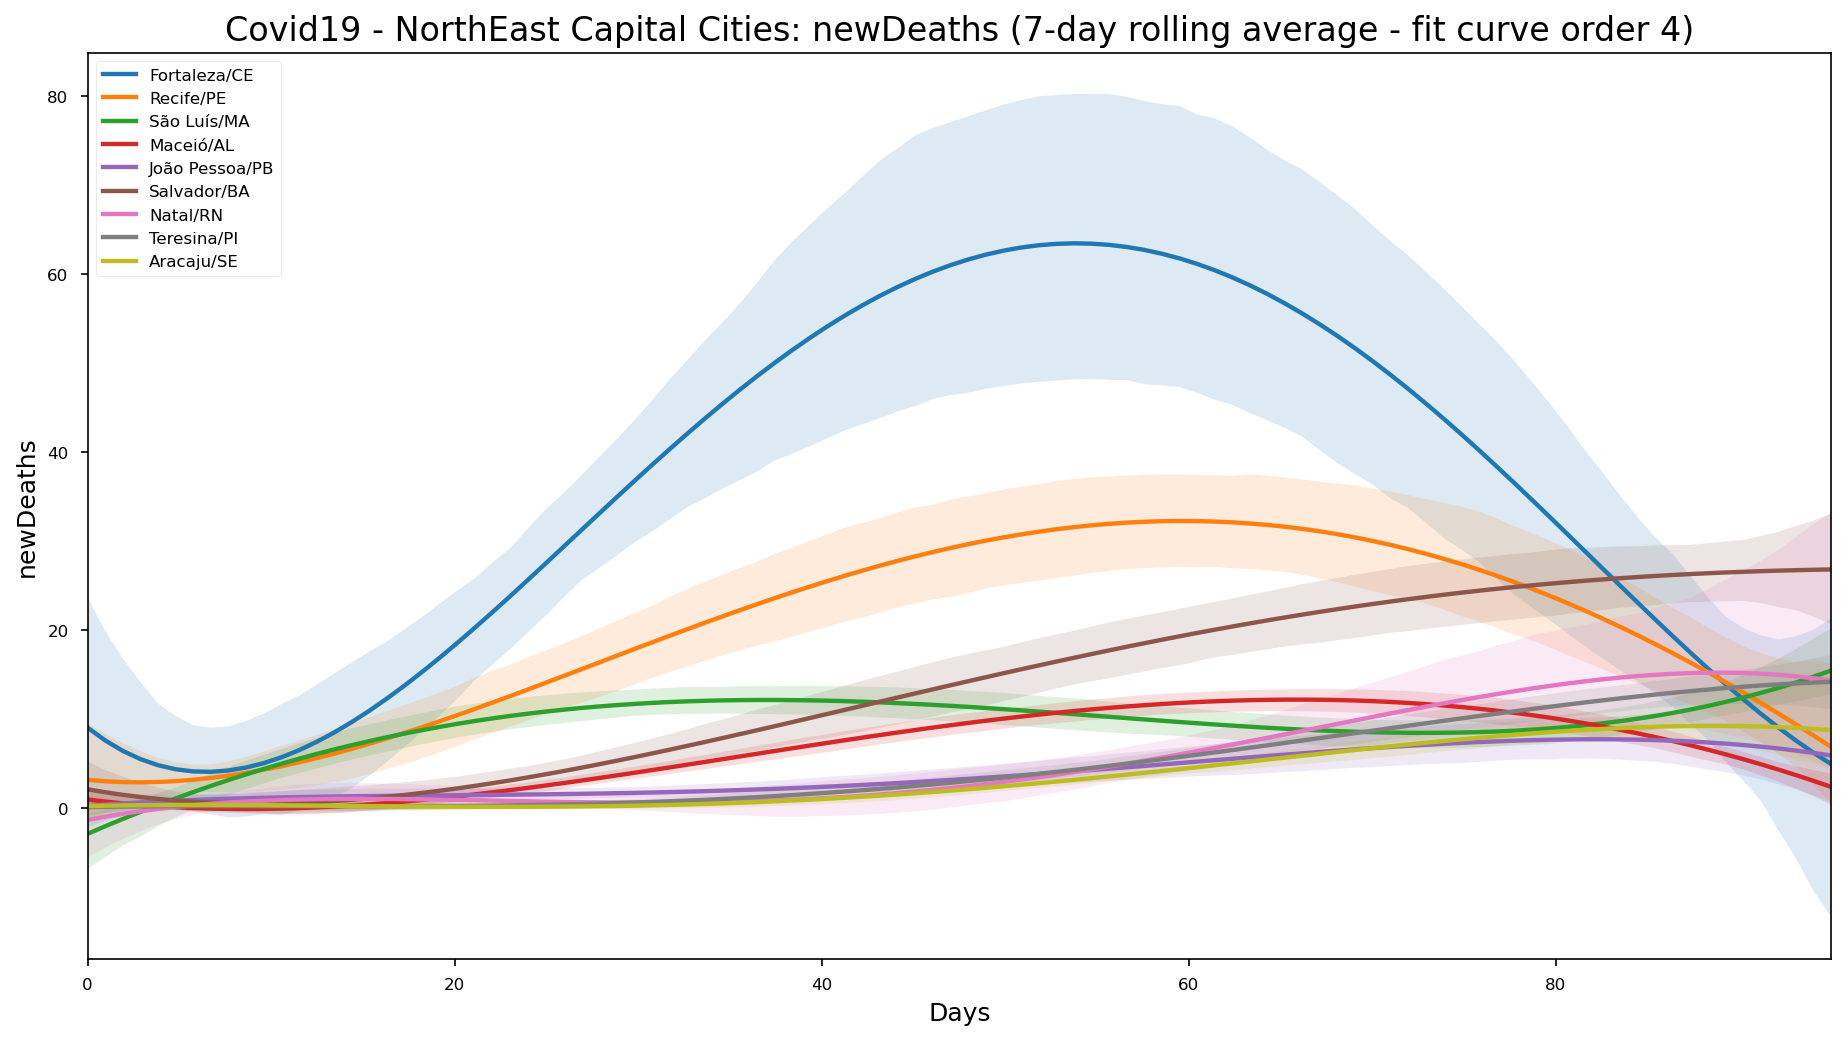

In [52]:
dx = plot_cities(dt_tm, NE_capital_cities, feature = 'newDeaths', title = 'NorthEast Capital Cities', mov=7, order=4)

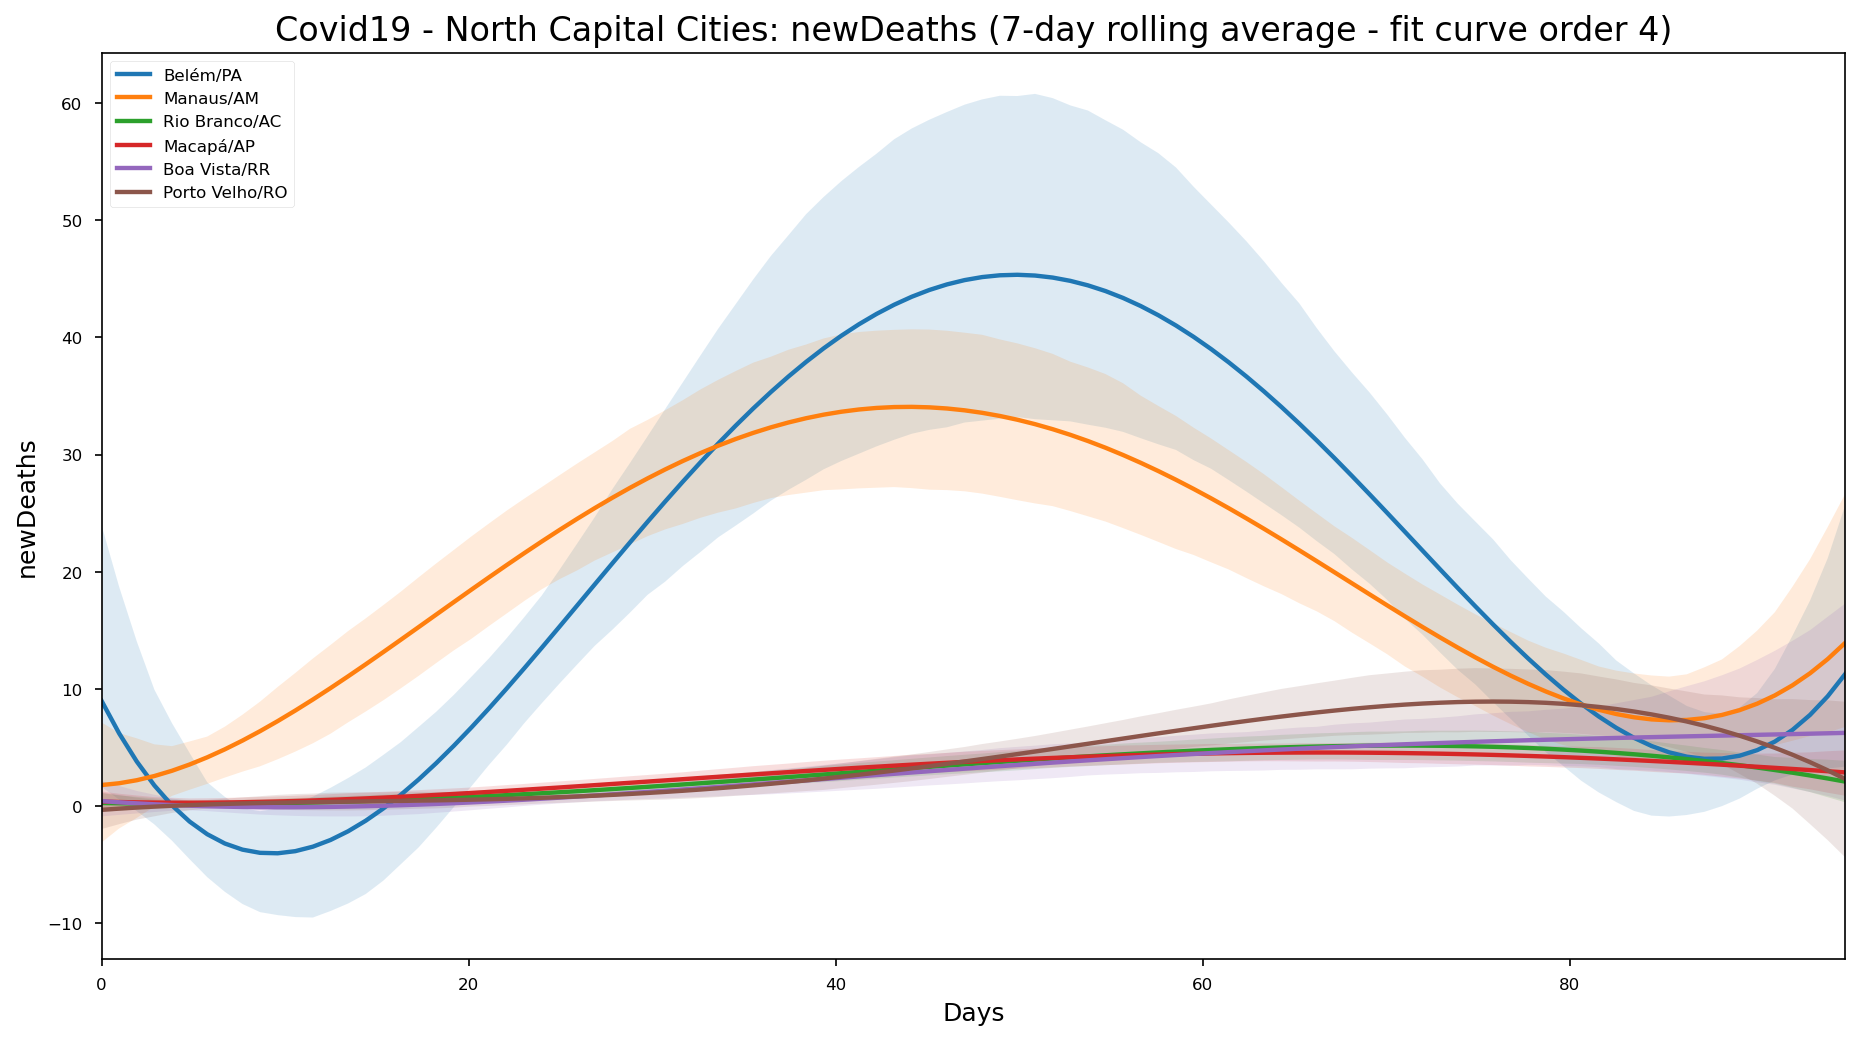

In [53]:
dx = plot_cities(dt_tm, N_capital_cities, feature = 'newDeaths', title = 'North Capital Cities', mov=7, order=4)

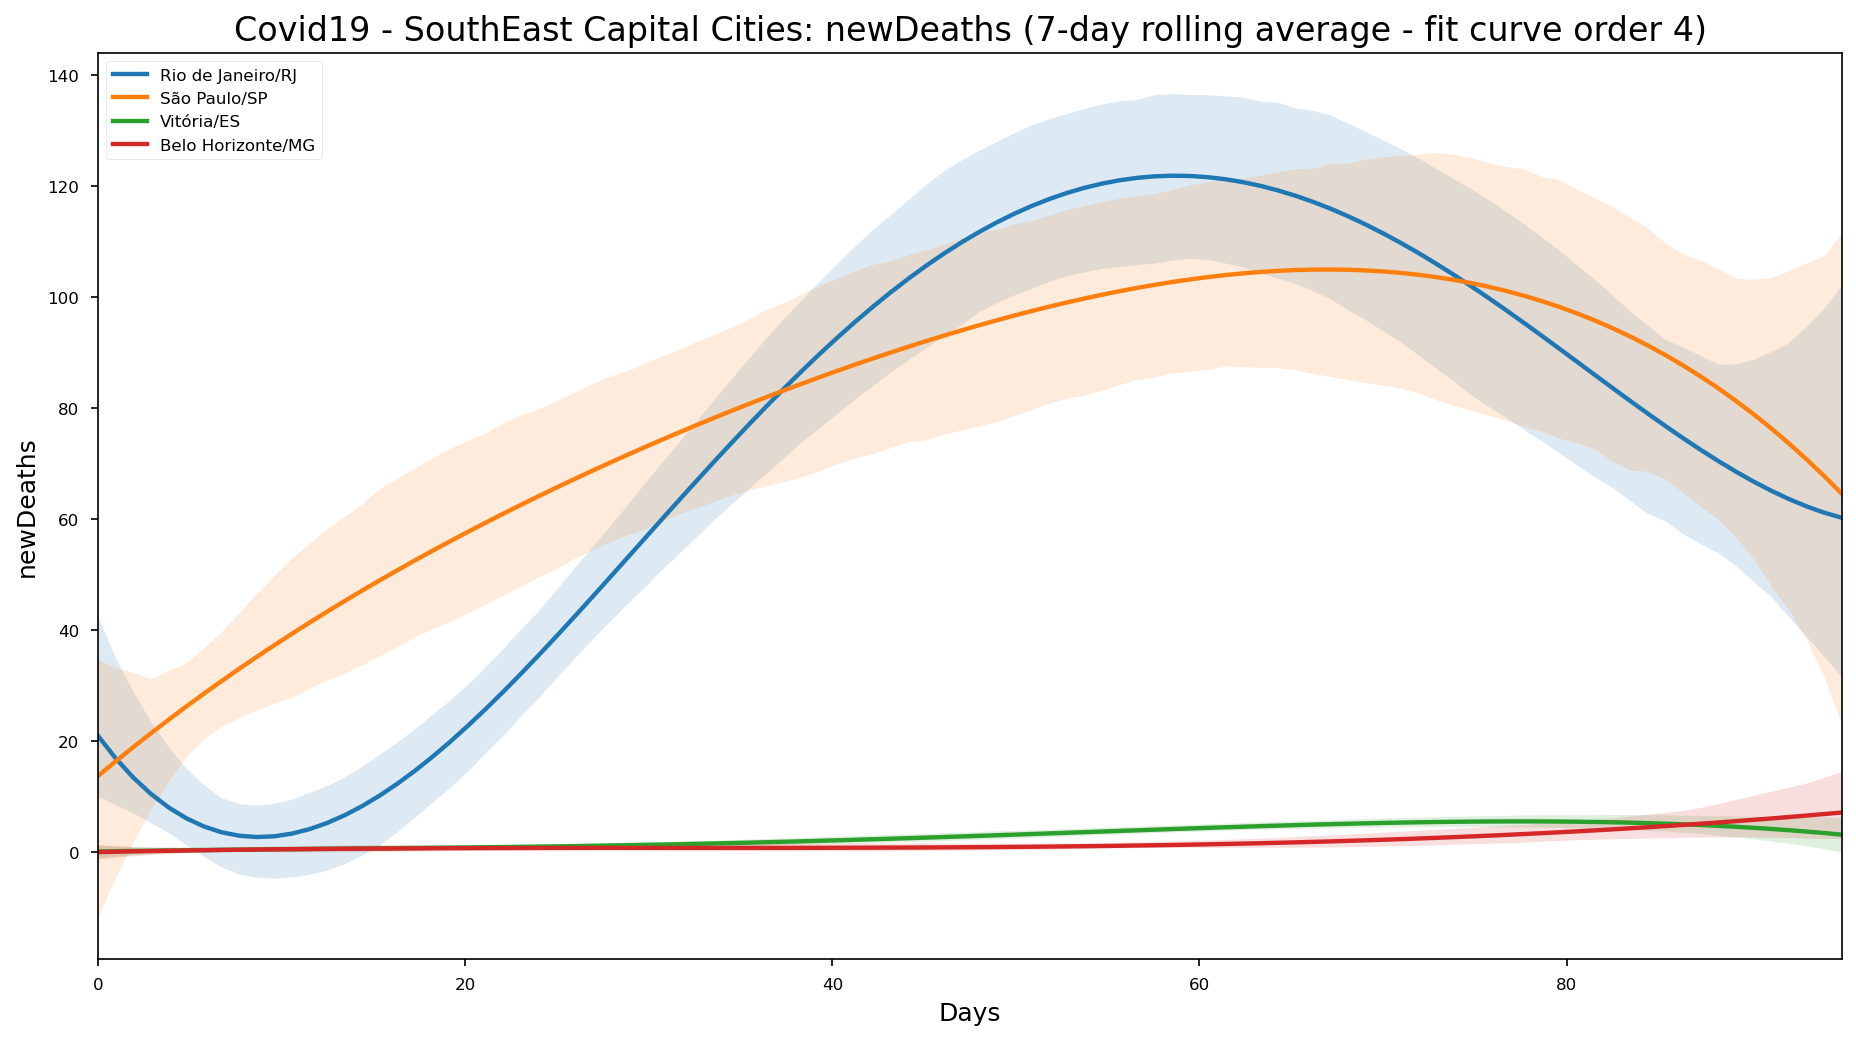

In [54]:
dx = plot_cities(dt_tm, SE_capital_cities, feature = 'newDeaths', title = 'SouthEast Capital Cities', mov=7, order=4)

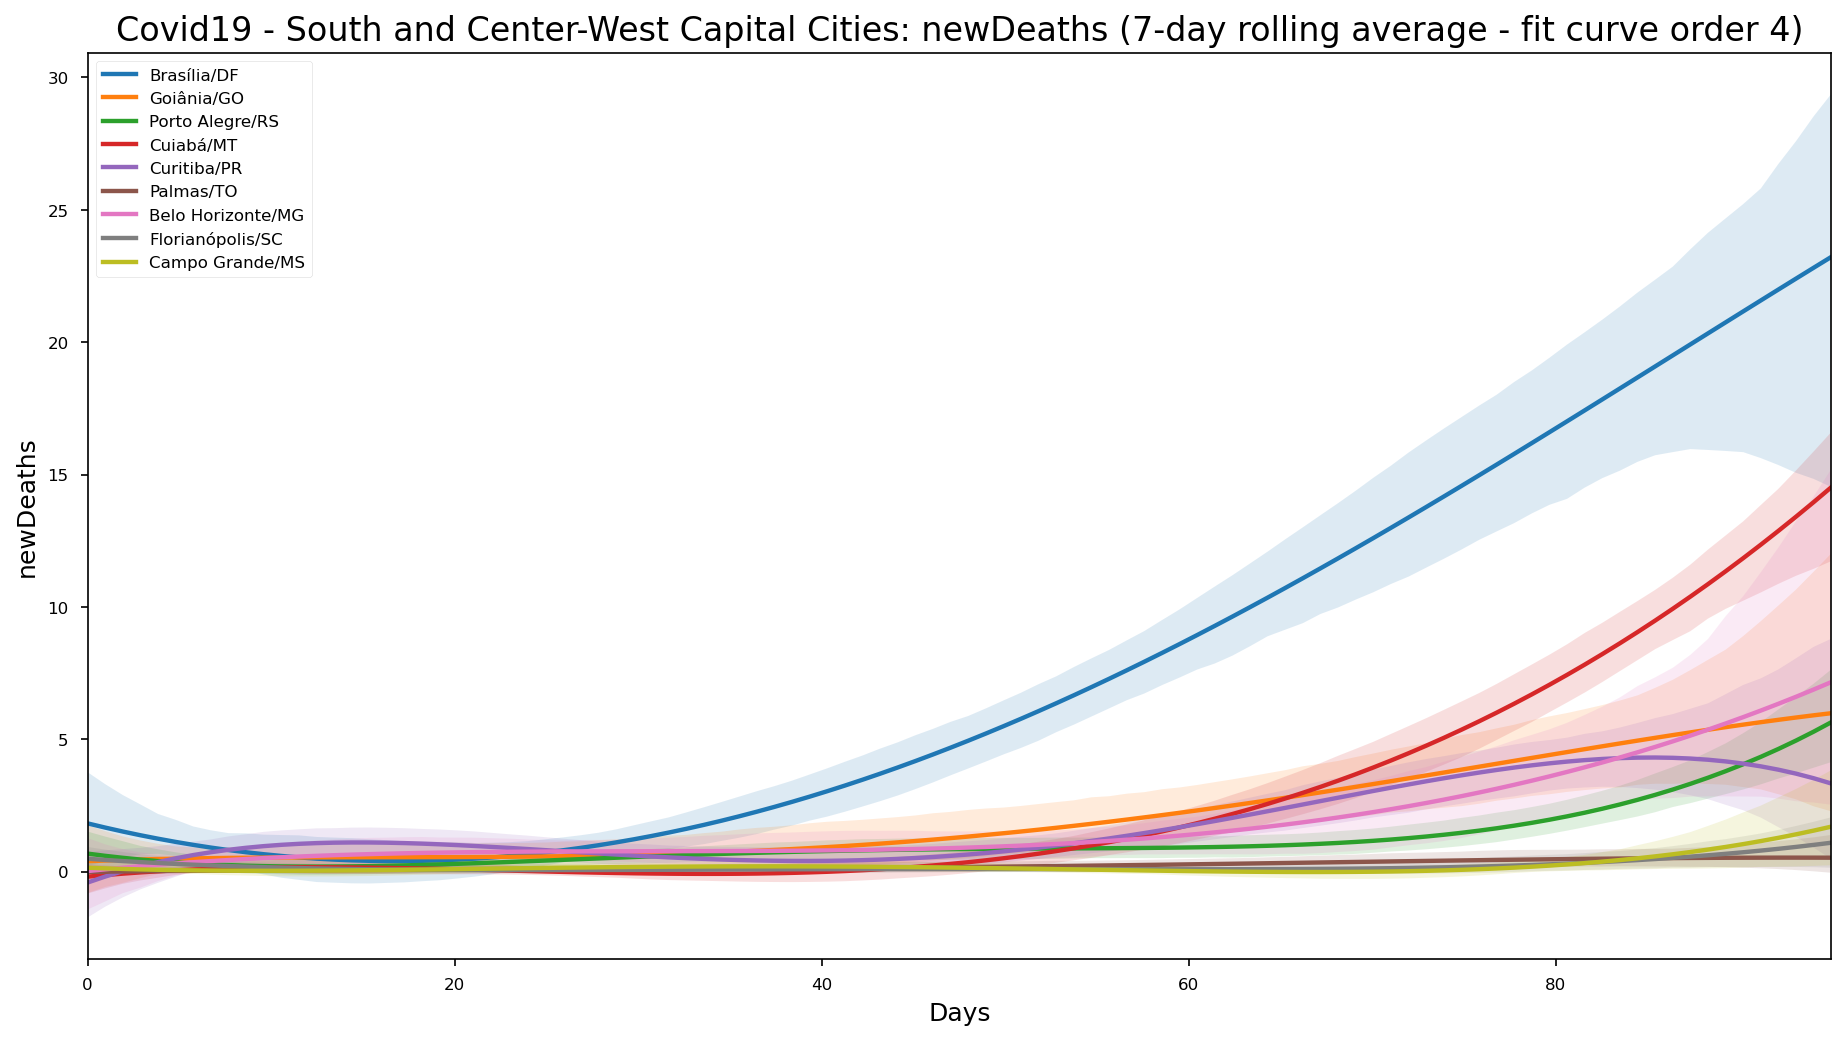

In [55]:
dx = plot_cities(dt_tm, S_CO_capital_cities, feature = 'newDeaths', title = 'South and Center-West Capital Cities', mov=7, order=4)

## Bar Race

In [56]:
bcr.bar_chart_race(dead_city, 
                   title='Brazil Top Cities with COVID-19 cases - Deaths per 100K inhabitants',
                   filename=None)

NameError: name 'dead_city' is not defined

In [ ]:
bcr.bar_chart_race(dead_city, 
                   title='Brazil Top Cities with COVID-19 cases - Deaths per 100K inhabitants',
                  filename='../videos/top_cities_deaths_100K.mp4')

In [ ]:
br_capital_cities = ['Belém', 
'Fortaleza',
'Recife',
'Manaus',
'Rio de Janeiro',
'São Luís',
'São Paulo',
'Maceió',
'Rio Branco',
'Vitória',
'Macapá',
'Boa Vista',
'Porto Velho',
'João Pessoa',
'Salvador',
'Natal',
'Teresina',
'Aracaju',
'Brasília',
'Goiânia',
'Porto Alegre',
'Cuiabá',
'Curitiba',
'Palmas',
'Belo Horizonte',
'Florianópolis',
'Campo Grande']

In [ ]:
capital_cities = ['Belém/PA', 
'Fortaleza/CE',
'Recife/PE',
'Manaus/AM',
'Rio de Janeiro/RJ',
'São Luís/MA',
'São Paulo/SP',
'Maceió/AL',
'Rio Branco/AC',
'Vitória/ES',
'Macapá/AP',
'Boa Vista/RR',
'Porto Velho/RO',
'João Pessoa/PB',
'Salvador/BA',
'Natal/RN',
'Teresina/PI',
'Aracaju/SE',
'Brasília/DF',
'Goiânia/GO',
'Porto Alegre/RS',
'Cuiabá/MT',
'Curitiba/PR',
'Palmas/TO',
'Belo Horizonte/MG',
'Florianópolis/SC',
'Campo Grande/MS']

In [ ]:
dead_capital = get_dataframe(df=dt_tm,
                          cities=capital_cities,
                          feature='deaths_per_100k_inhabitants',
                          rnd=0,
                          in_data='2020-03-20')

In [ ]:
dead_capital

In [ ]:
bcr.bar_chart_race(dead_capital, 
                   title='Brazil Capital Cities - COVID-19 - Deaths per 100K inhabitants',
                   filename=None)

In [ ]:
bcr.bar_chart_race(dead_capital, 
                   title='Brazil Capital Cities - COVID-19 - Deaths per 100K inhabitants',
                  filename='../videos/capital_cities_deaths_100K.mp4')

In [ ]:
top_cities_deaths

In [ ]:
dead_top_city = get_dataframe(df=dt_tm,
                          cities=top_cities_deaths,
                          feature='deaths_per_100k_inhabitants',
                          rnd=0,
                          in_data='2020-03-20')

In [ ]:
bcr.bar_chart_race(dead_top_city, 
                   title='Brazil Top Cities - COVID-19 - Deaths per 100K inhabitants',
                   filename=None)

In [ ]:
bcr.bar_chart_race(dead_top_city, 
                   title='Brazil Top Cities - COVID-19 - Deaths per 100K inhabitants',
                  filename='../videos/top_death_cities_deaths_100K.mp4')

# SRAG - FioCruz

In [ ]:
url = 'https://gitlab.procc.fiocruz.br/mave/repo/-/raw/master/Dados/InfoGripe/serie_temporal_com_estimativas_recentes.csv'

In [ ]:
srag = pd.read_csv(url, sep=';')
srag.shape

In [ ]:
srag.head()

In [ ]:
srag.info()

In [ ]:
srag['Unidade da Federação'].value_counts()

In [ ]:
srag.dado.value_counts()

In [ ]:
srag['Total reportado até a última atualização'] = srag['Total reportado até a última atualização'].

In [ ]:
srag_mg = srag[srag['Unidade da Federação'] == 'Minas Gerais']

In [ ]:
srag_mg.head()